In [1]:
%load_ext google.cloud.bigquery

In [39]:
%load_ext lab_black

In [44]:
import altair as alt
import pandas as pd

In [25]:
%%bigquery df_article_first_dat --project zenscr-seefood-dev

WITH first_appearance AS (
  SELECT
    article_id,
    MIN(t_dat) first_appearance_t_dat
  FROM `zenscr-seefood-dev.hm_kaggle.transactions` trans
  GROUP BY article_id
)
SELECT
  article_id,
  first_appearance_t_dat
FROM `zenscr-seefood-dev.hm_kaggle.articles`
LEFT JOIN first_appearance
USING (article_id)
ORDER BY first_appearance_t_dat ASC

Downloading: 100%|█████████| 105542/105542 [00:01<00:00, 59929.49rows/s]


In [46]:
df_article_first_dat["first_appearance_t_dat"] = pd.to_datetime(
    df_article_first_dat["first_appearance_t_dat"]
)

In [50]:
alt.Chart(
    df_article_first_dat["first_appearance_t_dat"]
    .value_counts()
    .to_frame()
    .reset_index()
).mark_line().encode(
    x="index", y="first_appearance_t_dat", tooltip=["first_appearance_t_dat"]
).properties(
    width=900
).interactive()

alt.Chart(...)

In [30]:
df_article_first_dat.isna().mean()

article_id                0.000000
first_appearance_t_dat    0.009428
dtype: float64

In [53]:
%%bigquery df_article_base --project zenscr-seefood-dev

SELECT
  dates.obs_dat,
  dates.t_dat,
  trans.article_id,
  EXTRACT(QUARTER FROM dates.t_dat) quarter,
FROM `zenscr-seefood-dev.hm_kaggle_reco.feat_base_dates` dates
LEFT JOIN `zenscr-seefood-dev.hm_kaggle.transactions` AS trans
       ON dates.t_dat = trans.t_dat
WHERE dates.obs_dat = "2020-04-01"

Query complete after 0.00s: 100%|█| 6/6 
Downloading: 100%|█| 23934157/23934157 [


In [54]:
df_article_base

,obs_dat,t_dat,article_id,quarter
0,2020-04-01,2020-03-31,841434001,1
1,2020-04-01,2020-03-31,771970008,1
2,2020-04-01,2020-03-31,841434001,1
3,2020-04-01,2020-03-31,715624008,1
4,2020-04-01,2020-03-31,737040007,1
...,...,...,...,...
23934152,2020-04-01,2019-04-13,697054014,2
23934153,2020-04-01,2019-04-13,747216001,2
23934154,2020-04-01,2019-04-13,475791004,2
23934155,2020-04-01,2019-04-13,689513001,2


In [56]:
df_article_base["t_dat"].agg(["min", "max"])

min    2018-09-20
max    2020-03-31
Name: t_dat, dtype: object

<AxesSubplot:>

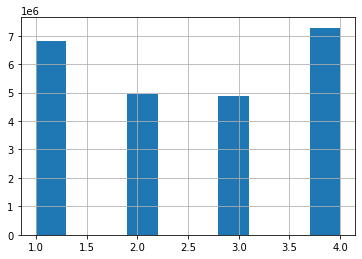

In [55]:
df_article_base["quarter"].hist()

In [67]:
q1_popularity_feat = df_article_base.groupby("article_id").apply(
    lambda g: (g["quarter"] == 1).sum() / g.shape[0]
)

<AxesSubplot:>

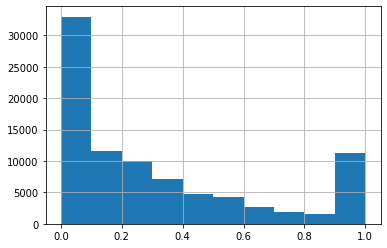

In [69]:
q1_popularity_feat.hist()

In [71]:
%%bigquery df_q1_pop --project zenscr-seefood-dev

SELECT
  dates.obs_dat,
  trans.article_id,
  COUNTIF(EXTRACT(QUARTER FROM dates.t_dat) = 1) / COUNT(*) feat_article_q1_popularity,
FROM `zenscr-seefood-dev.hm_kaggle_reco.feat_base_dates` dates
LEFT JOIN `zenscr-seefood-dev.hm_kaggle.transactions` AS trans
       ON dates.t_dat = trans.t_dat
WHERE dates.obs_dat = "2020-04-01"
GROUP BY obs_dat, article_id


Query is running:
Query executing s
Query complete af

Downloading:   0%
Downloading:   1%
Downloading:   5%
Downloading:  12%
Downloading:  23%
Downloading:  46%
Downloading: 100%


<AxesSubplot:>

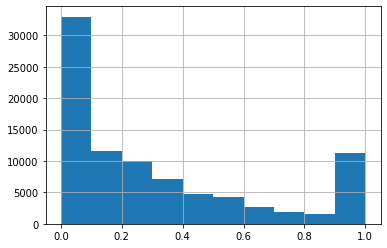

In [73]:
df_q1_pop["feat_article_q1_popularity"].hist()